### Exploring Customer Segmentation


<center>
    <img src = images/segments.jpeg>
</center>


In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

In [2]:
df = pd.read_csv('data/telco_churn_data.csv')

In [3]:
df.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

In [5]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


## Data Processing

In [6]:
#identify the none numerical features
object_cols = df.select_dtypes('object').columns.tolist()
print(object_cols)
print(type(object_cols))

['Customer ID', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'City', 'Churn Category', 'Churn Reason']
<class 'list'>


In [7]:
#drop the none numerical features
object_cols = df.select_dtypes('object').columns.tolist()
df_numeric = df.drop(object_cols, axis = 1)

In [8]:
print(df_numeric.shape)
df_numeric.info()

(7043, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Total Extra Data Charges           7043 non-null   float64
 8   Total Long Distance Charges        7043 non-null   float64
 9   Age                                7043 non-null   int64  
 10  Number of Dependents               7043 non-null   int64  
 11  Zip Code                           7043 non-n

In [9]:
#missing data
df_numeric['Customer Satisfaction']

0       NaN
1       NaN
2       NaN
3       2.0
4       2.0
       ... 
7038    NaN
7039    NaN
7040    4.0
7041    NaN
7042    NaN
Name: Customer Satisfaction, Length: 7043, dtype: float64

In [10]:
#drop the missing data and some data points to prevent noise during PCA process
object_cols = df.select_dtypes('object').columns.tolist() + ['Customer Satisfaction'] + ['Zip Code'] + ['Latitude'] + ['Longitude']
df_clean = df.drop(object_cols, axis = 1)

In [11]:
print(df_clean.shape)
df_clean.info()

(7043, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Avg Monthly GB Download            7043 non-null   int64  
 4   Monthly Charge                     7043 non-null   float64
 5   Total Regular Charges              7043 non-null   float64
 6   Total Refunds                      7043 non-null   float64
 7   Total Extra Data Charges           7043 non-null   float64
 8   Total Long Distance Charges        7043 non-null   float64
 9   Age                                7043 non-null   int64  
 10  Number of Dependents               7043 non-null   int64  
 11  Population                         7043 non-n

## PCA

In [12]:
#Scaling the data for PCA
df_scaled = (df_clean - df_clean.mean())/df_clean.std()

In [13]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA().fit(df_scaled)

# Calculate cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 90% of the variance
num_components_90_variance = np.argmax(cumulative_variance_ratio >= 0.90) + 1

print(f"Number of components explaining 90% variance: {num_components_90_variance}")

Number of components explaining 90% variance: 11


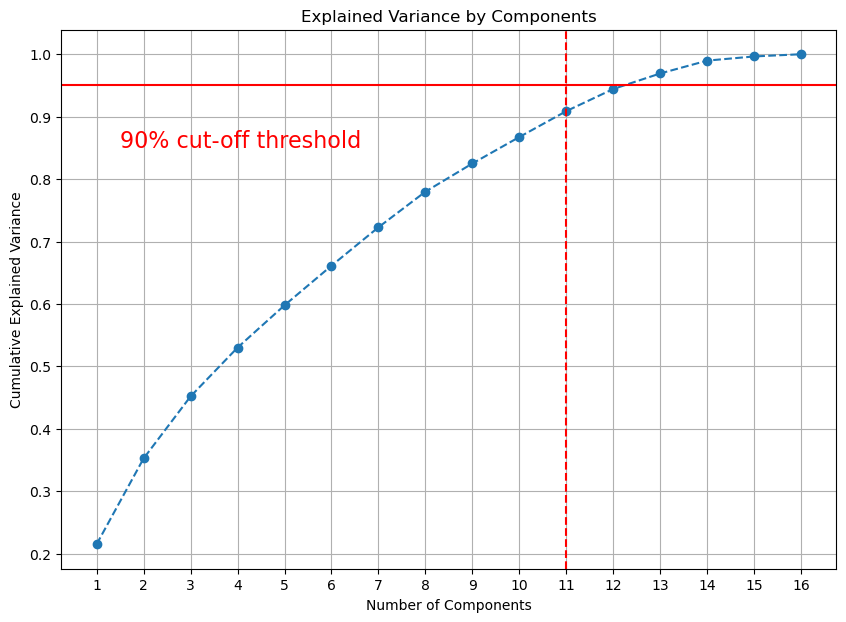

In [14]:
# Plot the explained variance
plt.figure(figsize=(10, 7))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
plt.axvline(x=num_components_90_variance-1, color='r', linestyle='--')
plt.xticks(np.arange(len(cumulative_variance_ratio)), np.arange(1, len(cumulative_variance_ratio)+1))
plt.grid(True)

plt.show()

In [15]:
#Extracting the Components
pca = PCA(n_components = 11)
pca.fit(df_scaled)
pca.transform(df_scaled)
components = pca.transform(df_scaled)


# components = pca.fit_transform(df_scaled)

# The loadings are the components_ attribute of the PCA object, but these need to be scaled by the square root of the eigenvalues (explained_variance_)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a dataframe of loadings with rows corresponding to features and columns to components
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=df_clean.columns)

loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Number of Referrals,0.420135,-0.287666,0.122795,-0.053190,0.516109,0.002939,0.025965,0.313948,0.262954,-0.456653,-0.063498
Tenure in Months,0.866625,-0.070503,-0.114821,-0.198324,0.077295,-0.021957,-0.073959,-0.118277,0.143729,0.058366,0.192271
Avg Monthly Long Distance Charges,0.250493,0.114900,-0.398925,0.815440,-0.059368,0.107721,0.076625,0.072718,-0.091977,-0.029358,-0.113327
Avg Monthly GB Download,0.235656,0.431972,0.703595,0.122012,-0.134475,-0.015453,0.067495,0.053007,-0.080531,-0.086472,-0.231199
Monthly Charge,0.448782,0.661614,-0.024157,-0.160730,-0.186038,-0.022399,0.121441,0.290011,-0.073539,-0.091992,-0.303736
Total Regular Charges,0.885906,0.245846,-0.071062,-0.232680,-0.060258,-0.044923,-0.006926,0.060323,0.071883,0.023360,0.015655
Total Refunds,0.067561,-0.009294,-0.007824,-0.172715,0.075300,0.652346,0.673828,-0.280223,-0.010764,-0.025990,-0.021919
Total Extra Data Charges,0.501896,0.362537,0.383857,-0.020063,-0.075933,-0.010689,0.027778,0.017816,-0.065616,0.256006,0.406601
Total Long Distance Charges,0.773219,0.031914,-0.359519,0.408833,0.023744,0.058812,-0.007619,-0.050148,0.055533,0.044390,0.093157
Age,-0.056707,0.071781,-0.664457,-0.425275,0.112158,-0.019424,0.090376,0.381298,-0.256949,0.173600,-0.050411


In [16]:
# Now we will sort each column by using a loop
sorted_indices = {f'PC{i+1}': loading_matrix[f'PC{i+1}'].abs().sort_values(ascending=False).index 
                  for i in range(loading_matrix.shape[1])}

loading_matrix_sorted_all = pd.DataFrame(sorted_indices)

loading_matrix_sorted_all

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,Total Regular Charges,Churn Value,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Number of Dependents,Population,Total Refunds,CLTV,Product/Service Issues Reported,Number of Referrals,Total Extra Data Charges
1,Tenure in Months,Monthly Charge,Age,Age,Number of Referrals,Total Refunds,Population,Age,Number of Dependents,Product/Service Issues Reported,Total Customer Svc Requests
2,Total Long Distance Charges,Total Customer Svc Requests,Avg Monthly Long Distance Charges,Total Long Distance Charges,Product/Service Issues Reported,Avg Monthly Long Distance Charges,CLTV,Number of Referrals,CLTV,Number of Dependents,Monthly Charge
3,Total Extra Data Charges,Product/Service Issues Reported,Total Extra Data Charges,Total Regular Charges,Total Customer Svc Requests,Product/Service Issues Reported,Monthly Charge,Monthly Charge,Number of Referrals,Total Customer Svc Requests,CLTV
4,CLTV,Avg Monthly GB Download,Number of Dependents,Tenure in Months,Monthly Charge,CLTV,Age,Total Refunds,Age,Total Extra Data Charges,Product/Service Issues Reported
5,Monthly Charge,Total Extra Data Charges,Total Long Distance Charges,CLTV,CLTV,Total Long Distance Charges,Avg Monthly Long Distance Charges,Number of Dependents,Total Customer Svc Requests,Age,Avg Monthly GB Download
6,Number of Referrals,Number of Dependents,Number of Referrals,Number of Dependents,Churn Value,Total Regular Charges,Tenure in Months,Product/Service Issues Reported,Tenure in Months,CLTV,Tenure in Months
7,Churn Value,Number of Referrals,Tenure in Months,Total Refunds,Avg Monthly GB Download,Total Customer Svc Requests,Number of Dependents,Population,Churn Value,Monthly Charge,Avg Monthly Long Distance Charges
8,Total Customer Svc Requests,Total Regular Charges,CLTV,Monthly Charge,Age,Monthly Charge,Avg Monthly GB Download,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Total Long Distance Charges
9,Avg Monthly Long Distance Charges,Avg Monthly Long Distance Charges,Churn Value,Avg Monthly GB Download,Tenure in Months,Tenure in Months,Total Customer Svc Requests,Total Customer Svc Requests,Avg Monthly GB Download,Churn Value,Number of Dependents


## K Means Clustering

In [ ]:
# Use the Elbow Method to find a good number of clusters
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(components)
    sse.append(km.inertia_)

# Plot SSE for each *k*
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.show()


In [ ]:
# Choose the k based on the Elbow Method
k = 3 # Example, based on the previous plot

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(components)

# Get cluster labels
clusters = kmeans.labels_

Cluster
0    3393
1    2008
2    1642
Name: count, dtype: int64


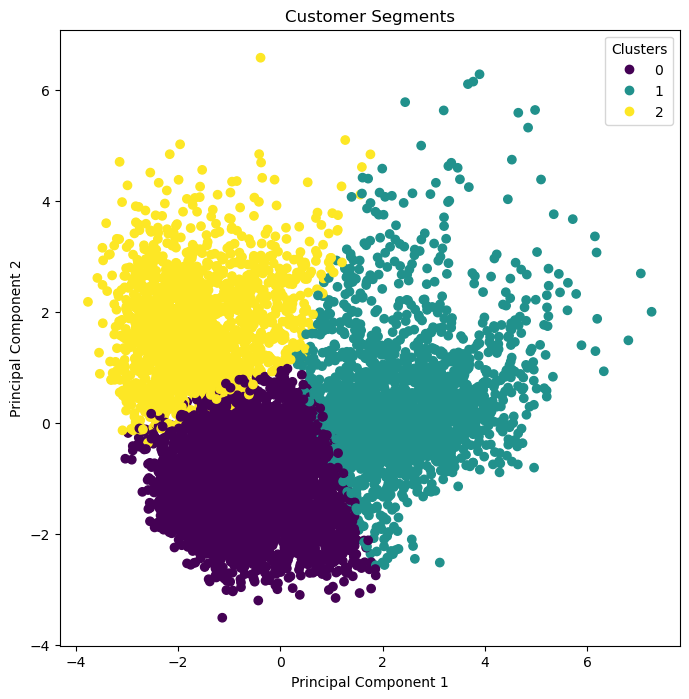

In [19]:
# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Print the size of each cluster
print(df['Cluster'].value_counts())

# Visualize the first two principal components
plt.figure(figsize=(8, 8))
scatter = plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


## Possible Hypothesis

### The scatter plot shows the segmentation of customers into three clusters based on two principal components (PC1 and PC2), and the loading matrix table provides the top contributing features to each principal component.

### From the scatter plot, can see that:

Cluster 1 (yellow) is the most distinct and is separate from the other two clusters. This suggests that the characteristics captured by PC1 and PC2 are significantly different for this cluster compared to the others.
Cluster 0 (purple) and Cluster 2 (teal) have some overlap but also show distinct areas, especially in the direction of PC1.

### Looking at the loading matrix, we see the top contributing features to PC1 and PC2:

PC1  is most influenced by Total Regular Charges, Churn Value, and Avg Monthly GB Download.
PC2 is most influenced by Churn Value, Avg Monthly Charge, and Total Extra Data Charges.


### Conclusions and hypotheses that could be drawn are:

The distinct Cluster 1 might represent customers with higher regular charges and data usage (since PC1 separates it from the others), which could suggest they are higher-value customers with potentially higher engagement or different usage patterns.
Cluster 0 and Cluster 2 might represent more typical users, with Cluster 2 potentially indicating customers more sensitive to charges and churn (given the influence of PC2).
Possible hypotheses for further exploration:

Customers in Cluster 1 may be more profitable and could be targeted with premium services or loyalty programs.
The overlap between Clusters 0 and 2 suggests there might be a transitional group of customers between these clusters. Investigating the specific behaviors and characteristics of the customers in the overlapping region could provide insights into how to reduce churn or upsell services.
Churn value being a top contributor to both PC1 and PC2 suggests it's a significant factor in customer segmentation, which could be further explored to understand the factors leading to churn and develop retention strategies.